# Chapter2 사이킷런으로 시작하는 머신러닝

## 01. 사이킷런 소개와 특징

In [74]:
import sklearn
import numpy as np

버전 확인

In [75]:
print(sklearn.__version__)

1.2.2


## 02. 첫번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기

* 지도학습: 정답 주어진 데이터 먼저 학습 -> 미지의 정답 예측  
  학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델 학습  
  -> 별도의 테스트 데이터 세트에서 미지의 레이블 예측
* sklearn.datasets: 사이킷런 자체적으로 제공하는 데이터 세트를 생성하는 모듈 모임
* sklearn.tree: 트리기반 ML 알고리즘을 구현한 클래스 모임  
      * ML 알고리즘: 의사결정트리(Decision Tree) 알고리즘->이를구현한 DecisionTreeClassifier 
* sklearn.model_selection  
  : 학습 데이터와 검증데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임  
      * 하이퍼파라미터: 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터를 통칭-> 머신러닝 알고리즘 성능 튜닝 가능
* train_test_split()함수: 데이터 세트를 학습데이터와 테스트데이터로 분리

In [76]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [77]:
import pandas as pd

# 불꽃 데이터 세트를 로딩합니다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


test_size: 전체 데이터 중 테스트 데이터의 비율  
random_state: 난수 발생값(호출시마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어짐, seed와 같은의미)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=11)

In [79]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

predict( ) 메서드: 학습된 모델 기반 테스트 데이터 세트에 대한 예측값 반환

In [80]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트)  
: 예측값과 실제 테스트 데이터가 얼마나 정확하게 일치한가 평가하는 지표인 정확도 측정

In [81]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.933333


#### **<예측 프로세스 정리>**
**1. 데이터 세트 분리:** 학습데이터 / 테스트 데이터  
**2. 모델 학습:** 학습 데이터 기반으로 ML 알고리즘 적용 -> 모델 학습  
**3. 예측 수행:** 학습된 ML 모델 이용-> 테스트 데이터 분류를 예측  
**4. 평가:** 예측된 결과값과 테스트 데이터의 실제 결괏값 비교 -> ML 모델 성능 평가

## 03. 사이킷런의 기반 프레임워크 익히기

### Estimator 이해 및 fit( ), predict( ) 메서드
* 분류 알고리즘: Classifier
* 회귀 알고리즘: Regressor
=> 지도학습의 모든 알고리즘을 구현한 클래스: Estimator 클래스
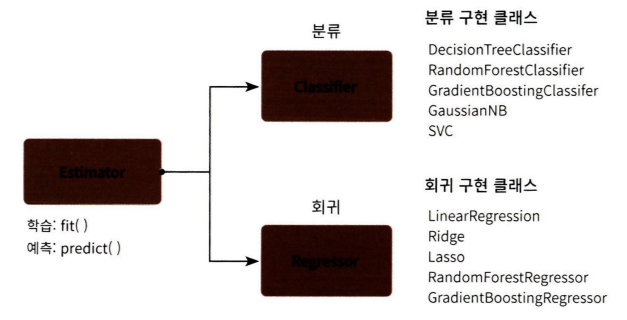
* 비지도 학습(차원 축소, 클러스터링, 피처추출 등)
  * fit(): 입력데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
  * transform(): 차원 변환, 클러스터링, 피처추출 등의 실제 작업
  * fit_transform(): 두개를 하나로 결합, 하지만 사용에 주의 필요

### 사이킷런의 주요 모듈
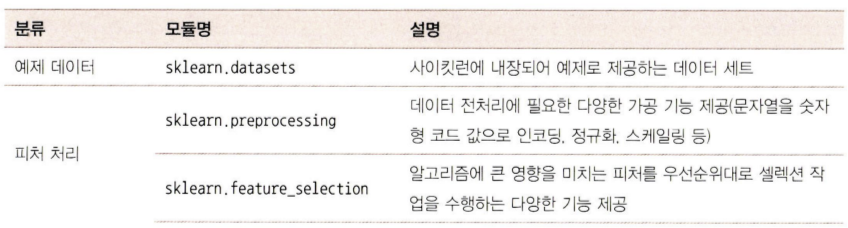
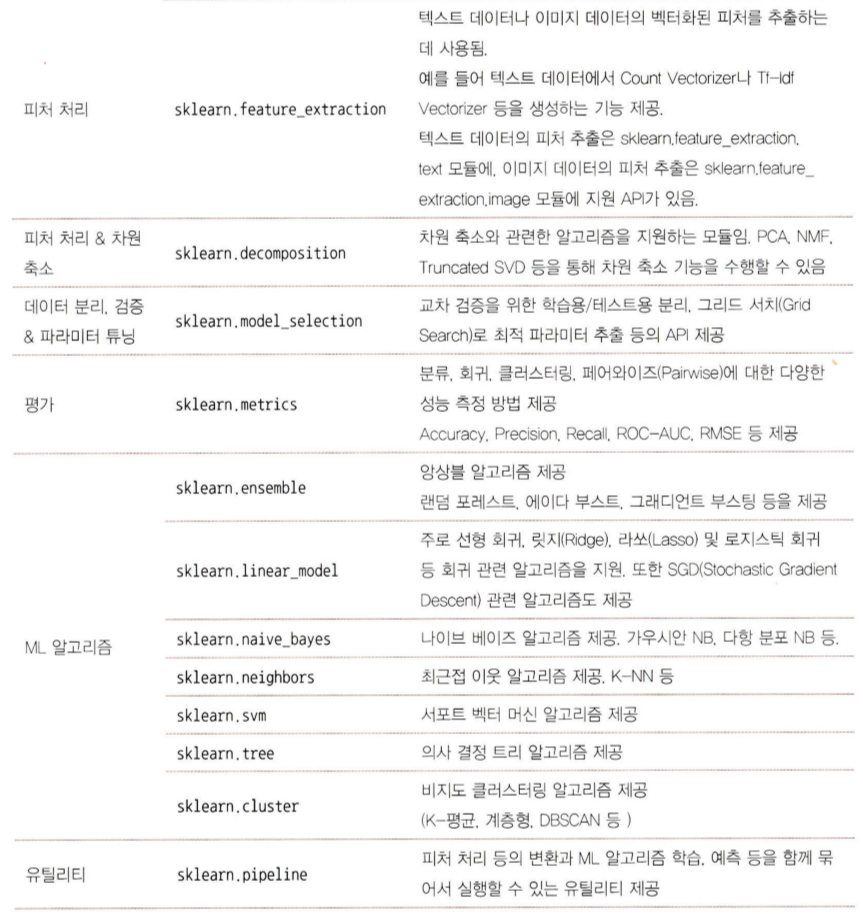

### 내장된 예제 데이터 세트
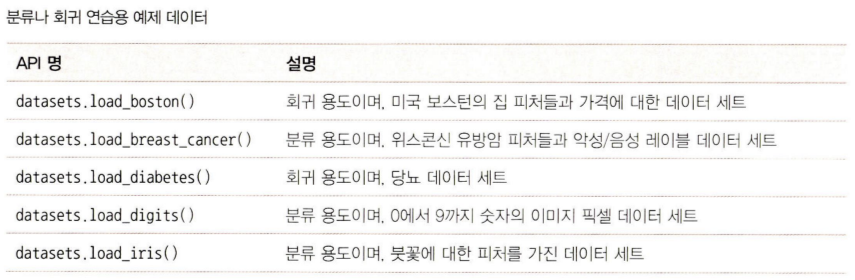

* fetch 계열의 명령: 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data 서브디렉터리에 저장 후 이용
  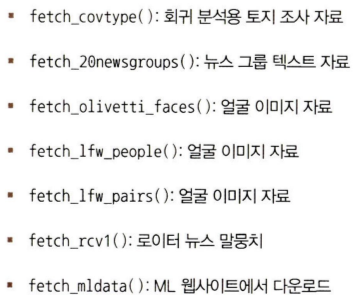

  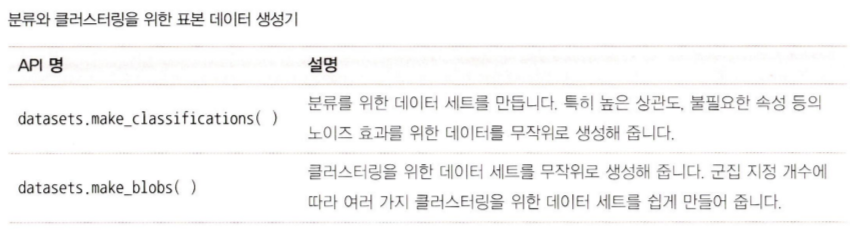

  * data: 피처의 데이터 세트
  * target: 분류 -> 레이블 값, 회귀 -> 숫자 결과값 데이터 세트  
    => 넘파이 배열(ndarray)
  * target_names: 개별 레이블의 이름
  * feature_names: 피처의 이름  
    => 넘파이 배열 or 파이썬 리스트 타입
  * DESCR: 데이터 세트에 대한 설명과 각 피처의 설명  
    => 스트링 타입

load_iris() 반환결과: sklearn.utils.Bunch 클래스

In [82]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [107]:
# 데이터키: 피처들의 데이터 값
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [108]:
print('\n feature_names 의 type:', type(iris_data.feature_names))
print(' feature_names 의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

# 데이터세트.data (=데이터세트['data'])
print('\n data의 type:', type(iris_data.data))
print(' data의 shape:', len(iris_data.data.shape))
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print(' target의 shape:', len(iris_data.target.shape))
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
 data의 shape: 2
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.

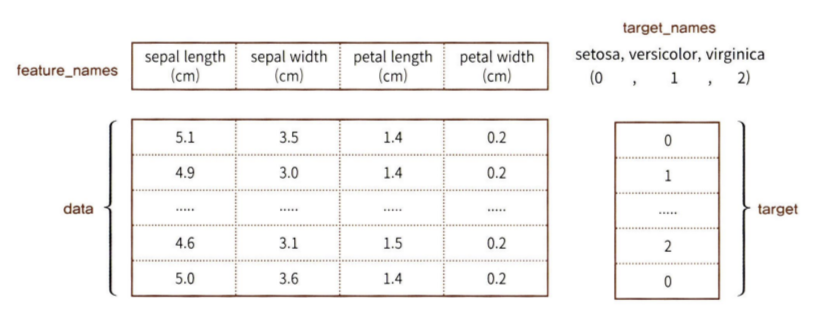

## 04. Model Selection 모듈 소개
### 학습/테스트 데이터 세트 분리 - train_test_split()

In [85]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


sklearn.model_selection모듈에서 train_test_split 로드: train_test_split(피처 데이터세트, 레이블 데이터세트)  
[선택적으로 입력받는 파라미터]  
* test_size: 전체 데이터에서 테스트 데이터 세트의 크기(default= 0.25)
* train_size: 전체 데이터에서 학습용 데이터 세트의 크기(잘 사용X)
* shuffle: 데이터 분리 전 데이터를 미리 섞을지 결정(default: True)  
  ->데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트 생성
* random_state: 호출할 때마다 동일한 학습/테스트용데이터 생성을 위해 주어지는 난수 값
* 반환값: 튜플형태  
  -> 학습용 피처 데이터 세트, 테스트용 피처 데이터 세트, 학습용 레이블 데이터세트, 테스트용 데이터의 레이블 데이터 세트

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
test_size=0.3, random_state=121)

학습데이터를 기반으로 DecisionTreeClassifier 학습+ 모델 이용해 예측 정확도 측정

In [88]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


### 교차검증
: 데이터 편중을 막기 위해 별도의 ㅇ여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것  
    * 대부분의 ML 모델 성능평가: 교차 검증 기반 1차 평가 -> 최종 테스트 데이터에 적용해 평가
    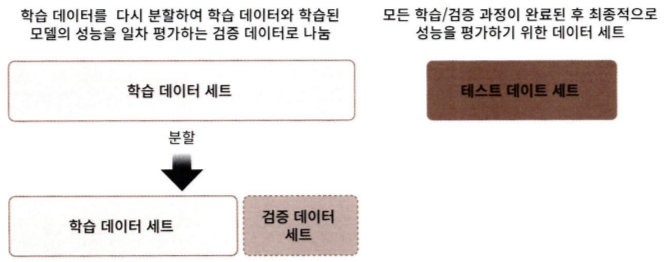

* K 폴드 교차 검증 - 가장 보편적으로 사용되는 교차 검증 기법  
  : K개의 데이터 폴드 세트 생성(데이터 세트를 K등분) -> K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
  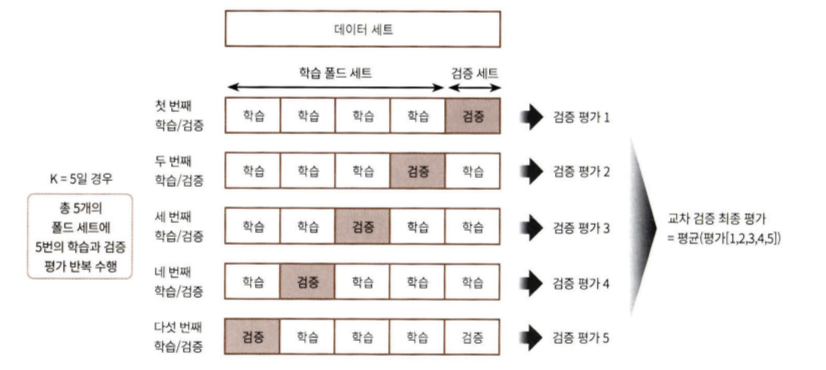

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [89]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 ㅔ스트이 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
    .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


* Stratified K 폴드: 불균형한(imbalanced) 분포도를 가진 레이블(결정클래스) 데이터 집합을 위한 K폴드 방식  
  불균형한분포도를 가진 레이블 데이터 집합: 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것
  * K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결
  * 원본 데이터의 레이블 분포 먼저 고려 -> 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [90]:
import pandas as pd 

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [91]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


In [92]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train=iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [94]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시마다 정확도 측정 
    n_iter += 1 
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
    .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


* 교차 검증을 보다 간편하게 - cross_val_score()
    1. 폴드 세트 설정
    2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
    3. 반족적으로 학습과 예측 수행 + 예측 성능 반환  
     => 일련의 과정 한꺼번에 수행

> cross_val_score(**estimator, x, y=None, scoring=None, cv=None**, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')      * **주요 파라미터** *
> * estimator: Classifier/Regressor
>   * Classifier: Stratified K폴드 방식으로 분할
>   * Regressor: K 폴드 방식으로 분할
> * x: 피처 데이터 세트
> * y: 레이블 데이터 세트
> * scoring: 예측 성능 평가 지표
> * cv: 교차 검증 폴드 수
> * 반환값: 성능 지표 측정값의 배열 형태
* cross_validate(): 여러개의 평가 지표 반환+학습데이터에 대한 성능 평가 지표와 수행시간 함께 제공

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파마리터 튜닝을 한 번에
* 하이퍼파라미터: 머신러닝 알고리즘을 구성하는 주요 구성요소 --값 조정--> 알고리즘의 예측 성능 개선 가능
* 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줌
* 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동 분할 -> 하이퍼 파라미터 그리드에 기술된 모든 파라미터 순차 적용  
  -> 최적의 파라미터 찾게 해줌 (단, 상대적으로 수행시간이 오래걸림)  
> [주요 파라미터]
> * estimator: classifier, regressor, pipeline
> * param_grid: key + 리스트 값을 가지는 딕셔너리가 주어짐/  
>    estimator 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정
> * scoring: 예측 성능 측정할 평가 방법 지정(보통 accuracy)
> * cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
> * refit: 디폴트가 True이며, True 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습

In [109]:
grid_parameters = {'max_depth': [1,2,3], 'min_samples_split': [2,3]}

In [99]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [100]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score','split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


주요 칼럼별 의미
* params 칼럼: 수행할 때마다 적용된 개별 하이퍼 파라미터값을 나타냄
* rank_test_score: 하이퍼 파라미터별로 성능이 좋은 score 순위나타냄 (1: 가장 뛰어남-> 이때의 파라미터: 최적 하이퍼 파라미터)
* mean_test_score: 개별 하이퍼 파라미터 별 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [103]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0: .4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.9750


In [105]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667
